In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
data_dir = '../../../data/' # adjust to the proper directory
trapnell = spu.get_psi_table(data_dir+'trapnell/Trapnell_SJ_counts_all.tab', minJR=1, minCell=1, drop_duplicates = False)
chen = spu.get_psi_table('chen_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
das = spu.get_psi_table('das_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
song = spu.get_psi_table(data_dir+'song/Song_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
lescroart = spu.get_psi_table('lescroart_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)

In [3]:
chen_PSI = chen[3]
chen_read_counts = chen[4]

chen_meta_pseudotime = pd.read_csv('../../../data/chen/chen.meta_pseudotime.tab', sep='\t', index_col=0)
ES2i = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES2i']
ES = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES']
Epi = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Epi']
MN = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Motor neuron']
bio = list(ES2i) + list(ES) + list(Epi) + list(MN)
chen_tpm_tab = pd.read_csv('../../../data/chen/chen.tpm.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_star_tab = pd.read_csv('../../../data/chen/chen.star.counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_el = pd.read_csv('../../../data/chen/chen.effective_length.gene_symbols.tab', sep='\t', index_col=0)[bio]
crpm_chen = pd.read_csv('../../../data/chen/chen_sr_score.tab', sep='\t', index_col = 0)[bio]
chen_mrna_counts = pd.read_csv('../../../data/chen/chen_mrna_counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)

###############################

lescroart_PSI = lescroart[3]
lescroart_read_counts = lescroart[4]
lescroart_bio = lescroart_PSI.columns
lescroart_tpm_tab = pd.read_csv('../../../data/lescroart/Lescroart.tpm.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_star_tab = pd.read_csv('../../../data/lescroart/Lescroart.star.counts.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_rsem_tab = pd.read_csv('../../../data/lescroart/Lescroart.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_el = pd.read_csv('../../../data/lescroart/Lescroart.effective_length.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
crpm_lescroart = pd.read_csv('../../../data/lescroart/lescroart_sr_score.tab', sep='\t', index_col = 0)
lescroart_mrna_counts = pd.read_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index_col=0)

##############################

trapnell_PSI = trapnell[3]
trapnell_read_counts = trapnell[4]
trapnell_bio = trapnell_PSI.columns
trapnell_tpm_tab = pd.read_csv('../../../data/trapnell/trapnell.tpm.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_star_tab = pd.read_csv('../../../data/trapnell/trapnell.star.counts.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_rsem_tab = pd.read_csv('../../../data/trapnell/trapnell.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_el = pd.read_csv('../../../data/trapnell/trapnell.effective_length.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
crpm_trapnell = pd.read_csv('../../../data/trapnell/trapnell_sr_score.tab', sep='\t', index_col = 0)
trapnell_mrna_counts = pd.read_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index_col=0)


###############################

song_PSI = song[3]
song_read_counts = song[4]
song_meta = pd.read_csv('../../../data/song/song_meta.tab', sep='\t', index_col=0)
song_bio = song_meta.index[song_meta.sample_type_s == 'Single Cell']
song_tpm_tab = pd.read_csv('../../../data/song/song.tpm.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
song_star_tab = pd.read_csv('../../../data/song/song.star.counts.tab', sep='\t', index_col=0)[song_bio]
song_rsem_tab = pd.read_csv('../../../data/song/song.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
song_el = pd.read_csv('../../../data/song/song.effective_length.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
crpm_song = pd.read_csv('../../../data/song/song_sr_score.tab', sep='\t', index_col = 0)
song_mrna_counts = pd.read_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index_col=0)


###############################

das_PSI = das[3]
das_read_counts = das[4]
das_bio = das_PSI.columns
das_tpm_tab = pd.read_csv('../../../data/das/das.tpm.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
das_star_tab = pd.read_csv('../../../data/das/das.star.counts.tab', sep='\t', index_col=0)[das_bio]
das_rsem_tab = pd.read_csv('../../../data/das/Das.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
das_el = pd.read_csv('../../../data/das/Das.effective_length.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
crpm_das = pd.read_csv('../../../data/das/das_sr_score.tab', sep='\t', index_col = 0)
das_mrna_counts = pd.read_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index_col=0)



In [4]:
chen_constitutive = pd.read_csv('chen_SJ_constitutive_counts.tab', sep='\t', index_col=0)[bio]
lescroart_constitutive = pd.read_csv('lescroart_SJ_constitutive_counts.tab', sep='\t', index_col=0)[lescroart_bio]
trapnell_constitutive = pd.read_csv('trapnell_SJ_constitutive_counts.tab', sep='\t', index_col=0)[trapnell_bio]
song_constitutive = pd.read_csv('song_SJ_constitutive_counts.tab', sep='\t', index_col=0)[song_bio]
das_constitutive = pd.read_csv('das_SJ_constitutive_counts.tab', sep='\t', index_col=0)[das_bio]


In [5]:
chen_mrna_counts_expressed = chen_mrna_counts.loc[chen_mrna_counts.median(axis=1) >= 1]
lescroart_mrna_counts_expressed = lescroart_mrna_counts.loc[lescroart_mrna_counts.median(axis=1) >= 1]
trapnell_mrna_counts_expressed = trapnell_mrna_counts.loc[trapnell_mrna_counts.median(axis=1) >= 1]
song_mrna_counts_expressed = song_mrna_counts.loc[song_mrna_counts.median(axis=1) >= 1]
das_mrna_counts_expressed = das_mrna_counts.loc[das_mrna_counts.median(axis=1) >= 1]

In [6]:
xlist = [x for x in chen_constitutive.index if x.split('_')[0] in chen_mrna_counts_expressed.index]
chen_mrna_per_junction = chen_mrna_counts_expressed.loc[[x.split('_')[0] for x in xlist]]
chen_mrna_per_junction.index = xlist

xlist = [x for x in lescroart_constitutive.index if x.split('_')[0] in lescroart_mrna_counts_expressed.index]
lescroart_mrna_per_junction = lescroart_mrna_counts_expressed.loc[[x.split('_')[0] for x in xlist]]
lescroart_mrna_per_junction.index = xlist

xlist = [x for x in trapnell_constitutive.index if x.split('_')[0] in trapnell_mrna_counts_expressed.index]
trapnell_mrna_per_junction = trapnell_mrna_counts_expressed.loc[[x.split('_')[0] for x in xlist]]
trapnell_mrna_per_junction.index = xlist

xlist = [x for x in song_constitutive.index if x.split('_')[0] in song_mrna_counts_expressed.index]
song_mrna_per_junction = song_mrna_counts_expressed.loc[[x.split('_')[0] for x in xlist]]
song_mrna_per_junction.index = xlist

xlist = [x for x in das_constitutive.index if x.split('_')[0] in das_mrna_counts_expressed.index]
das_mrna_per_junction = das_mrna_counts_expressed.loc[[x.split('_')[0] for x in xlist]]
das_mrna_per_junction.index = xlist

In [7]:
chen_ratio = (chen_constitutive.loc[chen_mrna_per_junction.index] / chen_mrna_per_junction).replace([np.inf, -np.inf], np.nan)
lescroart_ratio = (lescroart_constitutive.loc[lescroart_mrna_per_junction.index] / lescroart_mrna_per_junction).replace([np.inf, -np.inf], np.nan)
trapnell_ratio = (trapnell_constitutive.loc[trapnell_mrna_per_junction.index] / trapnell_mrna_per_junction).replace([np.inf, -np.inf], np.nan)
song_ratio = (song_constitutive.loc[song_mrna_per_junction.index] / song_mrna_per_junction).replace([np.inf, -np.inf], np.nan)
das_ratio = (das_constitutive.loc[das_mrna_per_junction.index] / das_mrna_per_junction).replace([np.inf, -np.inf], np.nan)


In [8]:
# SRA tables contain information on the average spot length for each dataset

song_srat = pd.read_csv('../../../data/song/SraRunTable.txt', sep='\t')
song_srat = song_srat.set_index('Run_s')#.columns
chen_srat = pd.read_csv('../../../data/chen/SraRunTable.txt', sep='\t')
chen_srat = chen_srat.set_index('Run_s')#.columns
trapnell_srat = pd.read_csv('../../../data/trapnell/SraRunTable.txt', sep='\t')
trapnell_srat = trapnell_srat.set_index('Run')#.columns
lescroart_srat = pd.read_csv('../../../data/lescroart/SraRunTable.txt', sep='\t')
lescroart_srat = lescroart_srat.set_index('Run')#.columns
das_srat = pd.read_csv('../../../data/das/SraRunTable.txt', sep='\t')
das_srat = das_srat.set_index('Run')#.columns


song_common_genes = [gene for gene in song_rsem_tab.index if ((gene in song_mrna_counts.index) & (gene in song_el.index))]
song_cells = song_mrna_counts.columns
song_counts_tab = song_rsem_tab.loc[song_common_genes, song_cells]
song_mrna_tab = song_mrna_counts.loc[song_common_genes, song_cells]
song_el_tab = song_el.loc[song_common_genes, song_cells]

trapnell_common_genes = [gene for gene in trapnell_rsem_tab.index if ((gene in trapnell_mrna_counts.index) & (gene in trapnell_el.index))]
trapnell_cells = trapnell_mrna_counts.columns
trapnell_counts_tab = trapnell_rsem_tab.loc[trapnell_common_genes, trapnell_cells]
trapnell_mrna_tab = trapnell_mrna_counts.loc[trapnell_common_genes, trapnell_cells]
trapnell_el_tab = trapnell_el.loc[trapnell_common_genes, trapnell_cells]

lescroart_common_genes = [gene for gene in lescroart_rsem_tab.index if ((gene in lescroart_mrna_counts.index) & (gene in lescroart_el.index))]
lescroart_cells = lescroart_mrna_counts.columns
lescroart_counts_tab = lescroart_rsem_tab.loc[lescroart_common_genes, lescroart_cells]
lescroart_mrna_tab = lescroart_mrna_counts.loc[lescroart_common_genes, lescroart_cells]
lescroart_el_tab = lescroart_el.loc[lescroart_common_genes, lescroart_cells]

das_common_genes = [gene for gene in das_rsem_tab.index if ((gene in das_mrna_counts.index) & (gene in das_el.index))]
das_cells = das_mrna_counts.columns
das_counts_tab = das_rsem_tab.loc[das_common_genes, das_cells]
das_mrna_tab = das_mrna_counts.loc[das_common_genes, das_cells]
das_el_tab = das_el.loc[das_common_genes, das_cells]

chen_common_genes = [gene for gene in chen_rsem_tab.index if ((gene in chen_mrna_counts.index) & (gene in chen_el.index))]
chen_cells = chen_mrna_counts.columns
chen_counts_tab = chen_rsem_tab.loc[chen_common_genes, chen_cells]
chen_mrna_tab = chen_mrna_counts.loc[chen_common_genes, chen_cells]
chen_el_tab = chen_el.loc[chen_common_genes, chen_cells]

song_len = song_srat.loc[song_cells, 'AvgSpotLen_l']
das_len = das_srat.loc[das_cells, 'AvgSpotLen']
chen_len = chen_srat.loc[chen_cells, 'AvgSpotLen_l']
trapnell_len = trapnell_srat.loc[trapnell_cells, 'AvgSpotLen']
lescroart_len = lescroart_srat.loc[lescroart_cells, 'AvgSpotLen']


song_c = ((song_counts_tab*(song_mrna_tab > 0)*song_len).sum()/(song_mrna_tab*song_el_tab).sum())
lescroart_c = ((lescroart_counts_tab*(lescroart_mrna_tab > 0)*lescroart_len).sum()/(lescroart_mrna_tab*lescroart_el_tab).sum())
trapnell_c = ((trapnell_counts_tab*(trapnell_mrna_tab > 0)*trapnell_len).sum()/(trapnell_mrna_tab*trapnell_el_tab).sum())
das_c = ((das_counts_tab*(das_mrna_tab > 0)*das_len).sum()/(das_mrna_tab*das_el_tab).sum())
chen_c = ((chen_counts_tab*(chen_mrna_tab > 0)*chen_len).sum()/(chen_mrna_tab*chen_el_tab).sum())


#chen_SR = (crpm_chen/chen_c)[chen_cells]
mrna_per_event_chen = chen_mrna_counts.loc[[x.split('_')[0] for x in chen_PSI.index]]
mrna_per_event_chen.index = chen_PSI.index

#lescroart_SR = (crpm_lescroart/lescroart_c)[lescroart_cells]
mrna_per_event_lescroart = lescroart_mrna_counts.loc[[x.split('_')[0] for x in lescroart_PSI.index]][lescroart_cells]
mrna_per_event_lescroart.index = lescroart_PSI.index

mrna_per_event_das = das_mrna_counts.loc[[x.split('_')[0] for x in das_PSI.index]]
mrna_per_event_das.index = das_PSI.index

mrna_per_event_trapnell = trapnell_mrna_counts.loc[[x.split('_')[0] for x in trapnell_PSI.index]]
mrna_per_event_trapnell.index = trapnell_PSI.index

mrna_per_event_song = song_mrna_counts.loc[[x.split('_')[0] for x in song_PSI.index]]
mrna_per_event_song.index = song_PSI.index

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stabl

In [9]:
chen_sj = chen_ratio[chen_c.index].mean()
das_sj = das_ratio[das_c.index].mean()
trapnell_sj = trapnell_ratio[trapnell_c.index].mean()
lescroart_sj = lescroart_ratio[lescroart_c.index].mean()
song_sj = song_ratio[song_c.index].mean()

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


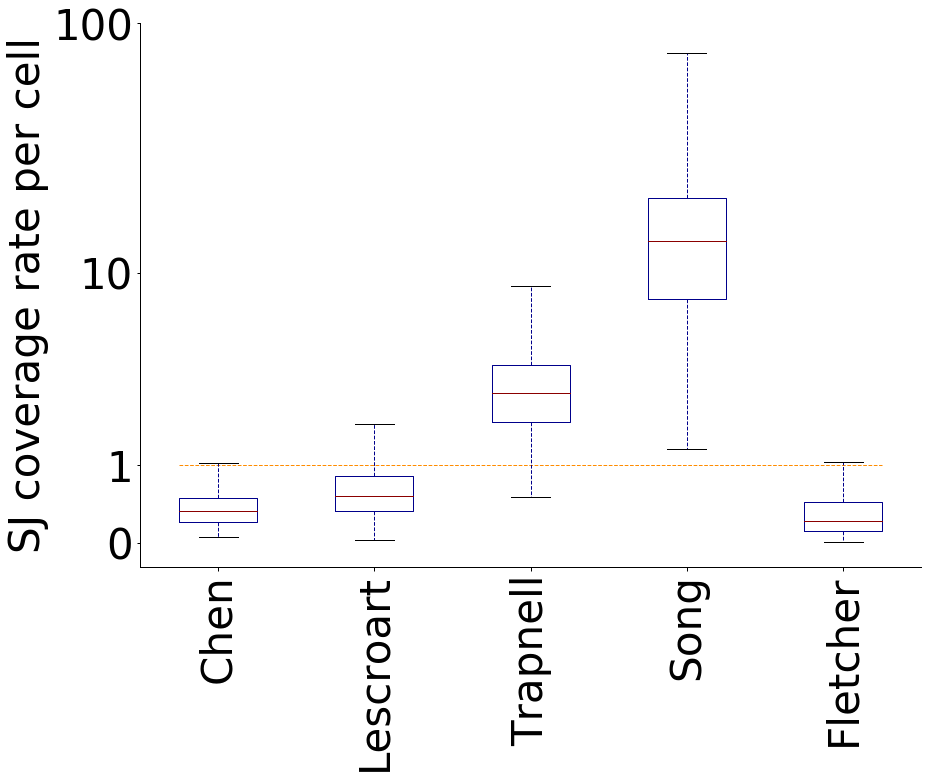

In [10]:
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher']

scp.plot_boxplot([np.log10(chen_sj+1),np.log10(lescroart_sj.dropna()+1), 
                  np.log10(trapnell_sj.dropna()+1), np.log10(song_sj.dropna()+1), 
                  np.log10(das_sj.dropna()+1)], 
                 'SJ coverage rate per cell', dset_names, 
                 'const_junction_reads_per_cell', ylocs = [0, np.log10(2), np.log10(11), np.log10(101)],
                 ytags = ['0', '1', '10', '100'], plot_line = np.log10(2), save_dir='plots2/figure3/')

plt.show()

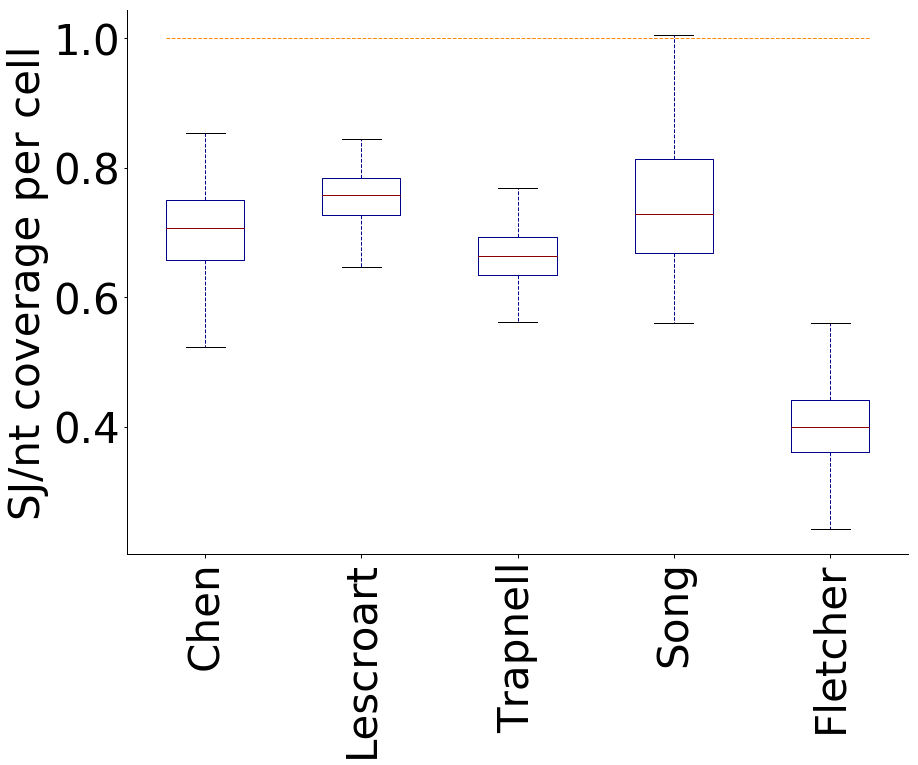

In [11]:
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher']

scp.plot_boxplot([chen_sj/chen_c, lescroart_sj/lescroart_c, trapnell_sj/trapnell_c, 
                  song_sj/song_c, das_sj/das_c], 
                 'SJ/nt coverage per cell', dset_names, 
                 'const_junction_reads_per_cell', plot_line = 1, save_dir='plots2/figure3/')

plt.show()

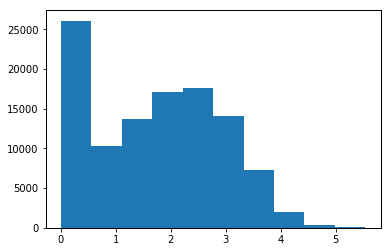

In [12]:
plt.hist(np.log10(chen_constitutive.sum(axis=1)+1))
plt.show()

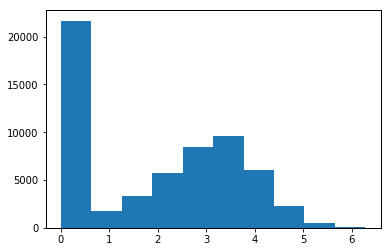

In [13]:
plt.hist(np.log10(song_constitutive.sum(axis=1)+1))
plt.show()

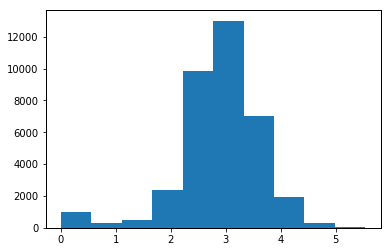

In [14]:
plt.hist(np.log10(chen_constitutive.loc[chen_mrna_per_junction.index].sum(axis=1)+1))
plt.show()

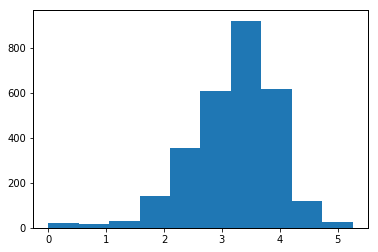

In [15]:
plt.hist(np.log10(das_constitutive.loc[das_mrna_per_junction.index].sum(axis=1)+1))
plt.show()

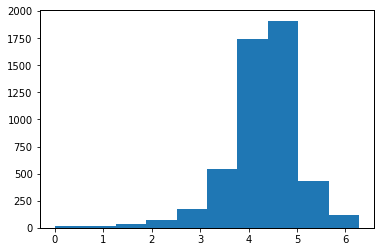

In [16]:
plt.hist(np.log10(song_constitutive.loc[song_mrna_per_junction.index].sum(axis=1)+1))
plt.show()

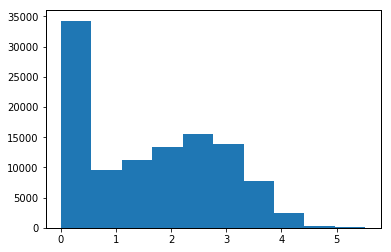

In [17]:
plt.hist(np.log10(lescroart_constitutive.sum(axis=1)+1))
plt.show()

In [18]:
chen_ratio[chen_c.index]

,SRR2727045,SRR2727046,SRR2727047,SRR2727048,SRR2727049,SRR2727050,SRR2727051,SRR2727052,SRR2727053,SRR2727054,...,SRR2727482,SRR2727483,SRR2727484,SRR2727485,SRR2727486,SRR2727487,SRR2727488,SRR2727489,SRR2727490,SRR2727491
Mrpl15_1,0.034975,0.138492,0.145067,0.079806,0.258744,0.152317,0.201946,0.123251,0.149892,0.128581,...,0.796578,0.986055,1.181887,0.901912,0.000000,0.905856,1.081578,0.083277,0.104310,0.134179
Mrpl15_2,0.069949,0.221588,0.199467,0.079806,0.258744,0.206075,0.333210,0.261909,0.252943,0.195667,...,1.405725,1.521343,1.050566,1.688194,0.000000,1.308459,0.540789,0.249832,0.295546,0.033545
Lypla1_1,0.077182,0.241885,0.436330,0.119437,0.462301,0.196767,0.408130,0.430899,0.264290,0.275973,...,1.039963,1.591230,0.000000,0.000000,0.000000,1.213583,0.000000,0.271536,0.392518,0.000000
Tcea1_1,0.092896,0.287687,0.000000,0.000000,0.055384,0.045385,0.136373,0.161289,0.169381,0.124071,...,0.459758,0.000000,0.538672,0.433789,NaN,0.578458,2.960403,0.000000,0.000000,0.000000
Tcea1_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
Tcea1_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
Tcea1_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
Tcea1_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
Tcea1_6,0.000000,0.215765,0.132952,0.165177,0.276921,0.226926,0.409119,0.268815,0.225842,0.330856,...,0.766264,1.688562,0.359115,0.000000,NaN,1.156917,0.000000,0.000000,0.155311,0.000000
Tcea1_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
